In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [2]:
# Import example NPS data
taxa_data = pd.read_csv(filepath_or_buffer = "../data/analysis_outputs/zoop_tree_data_taxa_w_env.csv")

In [3]:
# Structure and types
taxa_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 104 columns):
park_code                    object
site_code                    object
event_year                   int64
anc                          float64
ca                           float64
chlorophyll                  float64
cl                           float64
doc                          float64
k                            float64
mg                           float64
na                           float64
nh3_n                        float64
nh4_n                        float64
no3_n                        float64
no3_n_no2_n                  float64
po4                          float64
so4                          float64
tds                          float64
total_n                      float64
total_p                      float64
pheophytin                   float64
air_temp                     float64
bot_temp                     float64
mid_temp                     float64
surf_temp 

In [4]:
# Preview
taxa_data.head(5)

,park_code,site_code,event_year,anc,ca,chlorophyll,cl,doc,k,mg,...,swe_april_snotel,swe_may_snotel,ice_out_doy,ice_in_doy,flush_index_no_swe,flush_index_swe_may,wrt_index_swe_may,ln_clad,ln_cope,ln_rot
0,MORA,LH14,2008,70.0,1.375677,0.128,0.349035,0.42,0.126874,0.134771,...,183.642,197.104,NaN,NaN,8.14429,16.052722,0.062295,NaN,NaN,NaN
1,MORA,LH14,2009,92.5,1.577069,0.257,0.260580,3.59,0.166168,0.192799,...,109.982,114.808,186.0,NaN,8.14429,9.350297,0.106948,9.039751,8.078856,10.896468
2,MORA,LH14,2010,80.0,1.470362,0.033,0.245689,0.88,0.169296,0.215221,...,121.666,135.636,198.0,310.0,8.14429,11.046590,0.090526,7.515945,7.327665,8.294452
3,MORA,LH14,2011,100.0,1.614943,0.162,0.183292,7.97,0.176724,0.217287,...,183.896,216.154,NaN,NaN,8.14429,17.604209,0.056805,8.124363,6.803574,8.458345
4,MORA,LH14,2012,75.0,1.484088,0.159,0.287878,4.09,0.141145,0.184353,...,192.278,182.626,208.0,NaN,8.14429,14.873592,0.067233,6.123028,6.812292,9.491126


In [5]:
# NAs
taxa_data.isna().sum()

park_code                0
site_code                0
event_year               0
anc                    148
ca                      65
                      ... 
flush_index_swe_may     48
wrt_index_swe_may       48
ln_clad                 76
ln_cope                 76
ln_rot                  76
Length: 104, dtype: int64

In [6]:
taxa_data[~taxa_data.isin([np.nan, np.inf, -np.inf]).any(1)]
# taxa_data[~taxa_data.isin([np.nan, np.inf, -np.inf])]
# genus_data[~genus_data.isin([np.nan, np.inf, -np.inf]).any(1)]

#data_hist = genus_data[~genus_data.isin([np.nan, np.inf, -np.inf]).any(1)].hist(figsize=(12, 12))

,park_code,site_code,event_year,anc,ca,chlorophyll,cl,doc,k,mg,...,swe_april_snotel,swe_may_snotel,ice_out_doy,ice_in_doy,flush_index_no_swe,flush_index_swe_may,wrt_index_swe_may,ln_clad,ln_cope,ln_rot


In [15]:
# Selecting certain columns:
# genus_data.loc[:, "Conochilus":"Alona"] 

# Get zoop cols
zoop_names = taxa_data.loc[:,"clad":"rot"].columns

# Get predictor names
pred_names = ["chlorophyll", "air_temp", "ca"]

In [16]:
zoop_names

Index(['clad', 'cope', 'rot'], dtype='object')

In [17]:
# Get version of dataset with no NAs
# zoop_clean = genus_data.dropna(subset = zoop_names, how = 'any')
taxa_clean = taxa_data[np.concatenate((pred_names, list(zoop_names)))].dropna()

In [10]:
# pair_plot = sns.pairplot(data = zoop_clean, hue = "test", diag_kind = "kde", height = 5, plot_kws = {"s": 15})

In [18]:
# Note to self...scikit-learn decisiontreeregressor doesn't allow for categorical predictors...whaaaat?
# https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree
# Perhaps in a near-future release?
# https://github.com/scikit-learn/scikit-learn/pull/12866

# x = genus_data.loc[:, "park_code":"lake"].drop(["park_code", "site_code", "lake"], axis = 1)
x = taxa_clean[pred_names]

y = taxa_clean.loc[:, "clad":"rot"]

In [20]:
y.loc[:, "rot"] = np.log10(y["rot"] + 1 )
y.loc[:, "clad"] = np.log10(y["clad"] + 1 )
y.loc[:, "cope"] = np.log10(y["cope"] + 1 )

In [21]:
y

# Convert float64 to float32
# x.loc[:, x.dtypes == 'float64'] = x.loc[:, x.dtypes == 'float64'].astype('float32')
# x.info(verbose = True)
# x[~x.isin([np.nan, np.inf, -np.inf])]

,clad,cope,rot
5,0.694775,0.663561,0.768401
6,0.668255,0.647175,0.759337
7,0.648984,0.652518,0.715182
8,0.668638,0.636107,0.665312
9,0.672971,0.621631,0.610161
...,...,...,...
204,0.597857,0.690858,0.665068
205,0.642417,0.526994,0.629304
206,0.658105,0.351007,0.740925
207,0.671459,0.595516,0.762528


In [22]:
zoop_tree = DecisionTreeRegressor(max_depth = 1)
zoop_tree_fit = zoop_tree.fit(x, y)

[Text(167.4, 163.07999999999998, 'X[0] <= 0.162\nmse = 0.045\nsamples = 167\nvalue = [[0.415]\n[0.582]\n[0.541]]'),
 Text(83.7, 54.360000000000014, 'mse = 0.043\nsamples = 49\nvalue = [[0.239]\n[0.541]\n[0.445]]'),
 Text(251.10000000000002, 54.360000000000014, 'mse = 0.037\nsamples = 118\nvalue = [[0.488]\n[0.599]\n[0.58]]')]

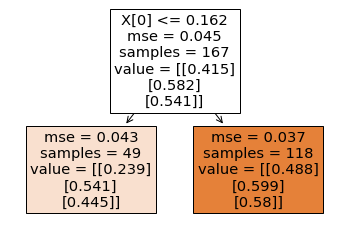

In [23]:
plot_tree(zoop_tree_fit, filled = True)

In [ ]:
dot_data = export_graphviz(zoop_tree_fit, out_file=None, 
                      feature_names=x.columns,
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data, format = "png")  
graph 
graph.render("../figures/decision_tree_graphivz")

In [ ]:
X = x.to_numpy()
Y = y.to_numpy()

In [ ]:
Xt, Xv, Yt, Yv = model_selection.train_test_split(x,
                                                  y,
                                                  test_size = 0.2,
                                                  random_state = 7)

In [ ]:
kfold = model_selection.KFold(n_splits = 10,
                              random_state = 7)

In [ ]:
results = {
    'multi_output_tree' : np.zeros(10)
}

In [ ]:
scoring = "accuracy"
error_score = np.nan

In [ ]:
# Ugh, looks like this method doesn't work for multioutput that is continuous (i.e., regression)
results['multi_output_tree'] = model_selection.cross_val_score(zoop_tree, Xt, Yt,
                                                                cv = kfold, 
                                                                scoring = scoring,
                                                                error_score = error_score)

In [ ]:
# Eval method from: https://machinelearningmastery.com/multi-output-regression-models-with-python/

# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(zoop_tree, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))